In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
conv_base = VGG16(weights="imagenet", 
                include_top=False, # fully connected layer를 사용할 것이냐 말것이냐?
                input_shape=(150,150,3))

In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
from keras import layers
from keras import models
# Data Preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
# Draw Image / plot
import matplotlib.pyplot as plt
import numpy as np
import os

In [24]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dense(1, activation="sigmoid"))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
# 모델을 컴파일하고 훈련하기 전에 합성곱 기반 층을 동결하는 것이 중요.
# 동결(Freezing)하지 않으면 기존에 학습되어 있던 
# VGG16의 합성곱 층의 가중치들이 업데이트되어 버린다. 

print('before freezing conv_base layer', len(model.trainable_weights))
conv_base.trainable = False
print('after freezing conv_base layer', len(model.trainable_weights))

# ????? 
# freezing이 되어 있던 모양인데?

before freezing conv_base layer 4
after freezing conv_base layer 4


# Data Preprocessing

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

test_datagen  = ImageDataGenerator(rescale=1./255)

dataset_dir = "../keras_dataset/dogs_cats_small/"
train_dir = dataset_dir + "train"
valid_dir = dataset_dir + "validation"

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(valid_dir,
                                                        target_size=(150,150),
                                                        batch_size=20, 
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
model.compile(loss="binary_crossentropy", 
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [28]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30, 
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=2)

Epoch 1/30
 - 19s - loss: 0.6245 - acc: 0.6460 - val_loss: 0.4642 - val_acc: 0.8020
Epoch 2/30
 - 13s - loss: 0.4871 - acc: 0.7815 - val_loss: 0.3839 - val_acc: 0.8460
Epoch 3/30
 - 14s - loss: 0.4283 - acc: 0.8180 - val_loss: 0.3354 - val_acc: 0.8680
Epoch 4/30
 - 14s - loss: 0.3956 - acc: 0.8240 - val_loss: 0.3151 - val_acc: 0.8790
Epoch 5/30
 - 15s - loss: 0.3985 - acc: 0.8195 - val_loss: 0.3034 - val_acc: 0.8800
Epoch 6/30
 - 15s - loss: 0.3697 - acc: 0.8300 - val_loss: 0.2834 - val_acc: 0.8830
Epoch 7/30
 - 17s - loss: 0.3507 - acc: 0.8540 - val_loss: 0.2806 - val_acc: 0.8920
Epoch 8/30
 - 15s - loss: 0.3494 - acc: 0.8455 - val_loss: 0.2695 - val_acc: 0.8980
Epoch 9/30
 - 17s - loss: 0.3366 - acc: 0.8585 - val_loss: 0.2745 - val_acc: 0.8920
Epoch 10/30
 - 14s - loss: 0.3297 - acc: 0.8580 - val_loss: 0.2544 - val_acc: 0.8970
Epoch 11/30
 - 14s - loss: 0.3317 - acc: 0.8580 - val_loss: 0.2558 - val_acc: 0.8990
Epoch 12/30
 - 14s - loss: 0.3306 - acc: 0.8560 - val_loss: 0.2630 - val_a

# Drawing plot

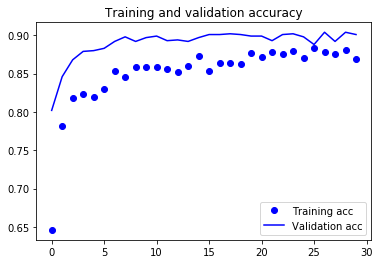

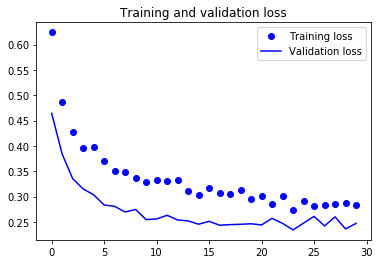

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()